<a href="https://colab.research.google.com/github/ObiDaniel/ObiDaniel/blob/main/Black_Friday_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information**

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences.

***Problem: Predict purchase amount***

# Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Import datasets

In [ ]:
amount_df = pd.read_csv("train.csv")
amount_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Statistical information

amount_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
#datatypes of the dataset attributes

amount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# Check unique values in dataset

amount_df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Data Preprocessing

In [ ]:
# check for null values

amount_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
amount_df['Product_Category_2'] = amount_df['Product_Category_2'].fillna(-2.0).astype("float32")
amount_df['Product_Category_3'] = amount_df['Product_Category_3'].fillna(-2.0).astype("float32")

In [ ]:
amount_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# PERFORM SOME EXPLORATORY DATA ANALYSIS(EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9531b5b7d0>,
      dtype=object)

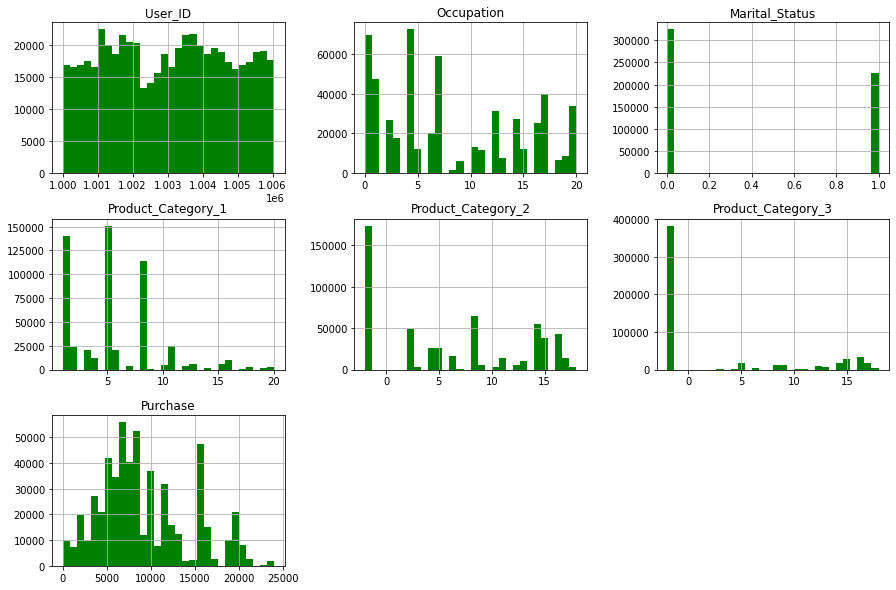

In [ ]:
#Visualizing the numeric variables

amount_df.hist(bins = 30, figsize = (15,10), color = 'g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


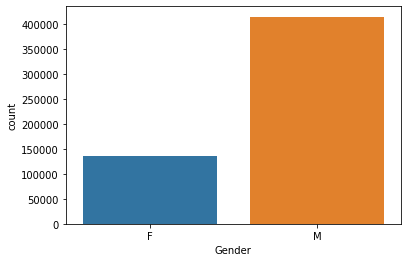

In [ ]:
#Visualizing the categorical variables

sns.countplot(amount_df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


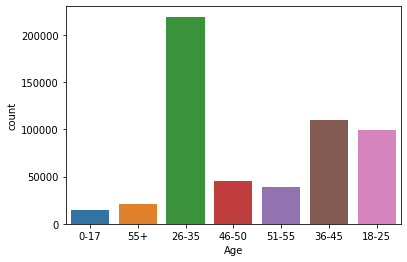

In [ ]:
sns.countplot(amount_df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


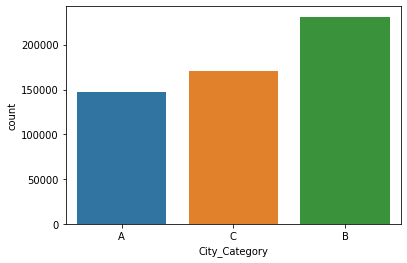

In [ ]:
sns.countplot(amount_df['City_Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


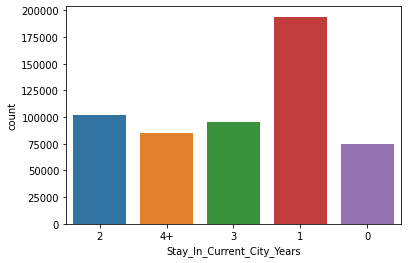

In [ ]:
sns.countplot(amount_df['Stay_In_Current_City_Years'])

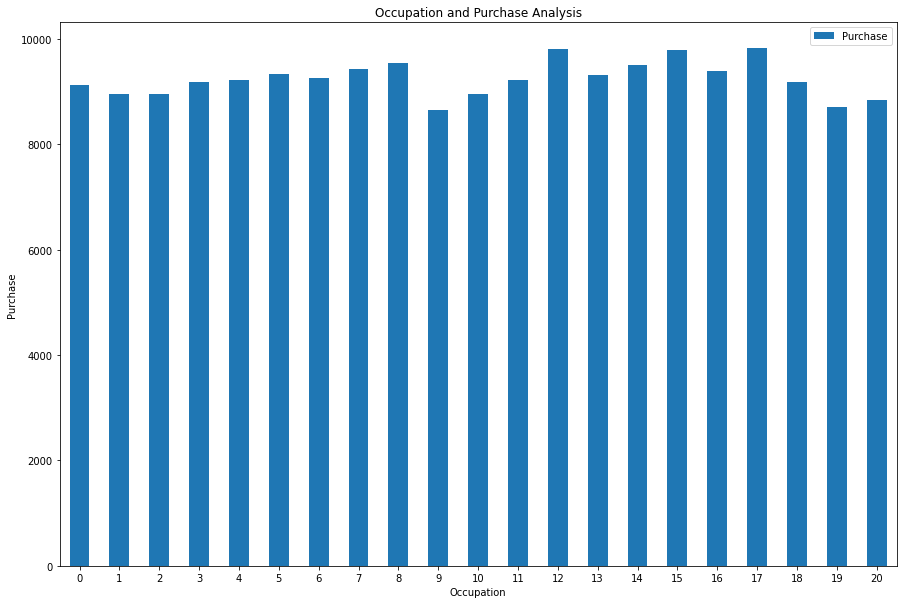

In [ ]:
#Let's do bivariate analysis. NB: You can play around with aggfunc=np.mean, can replace mean with sum and see how it pans out

occupation_plot = amount_df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

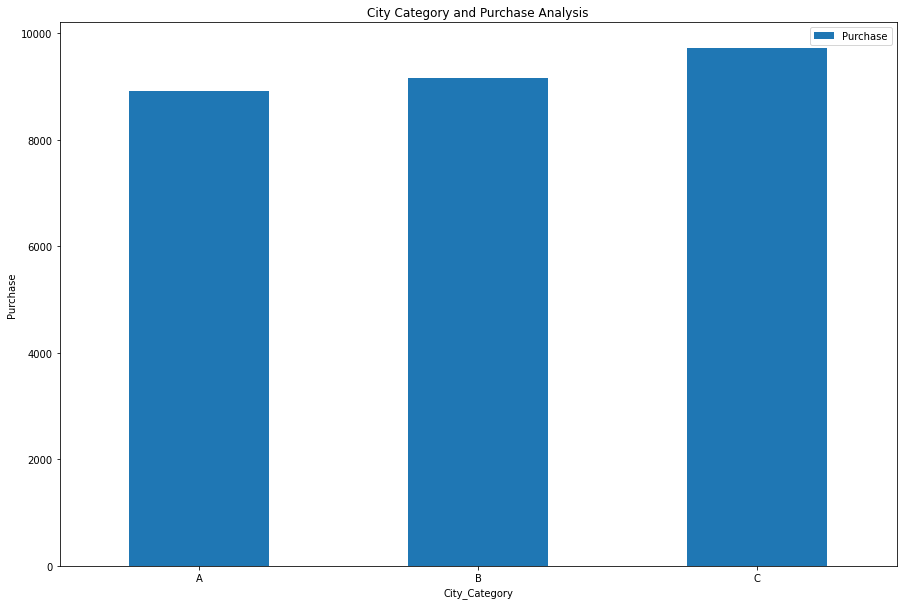

In [ ]:
city_category_plot = amount_df.pivot_table(index='City_Category', values='Purchase', aggfunc=np.mean)
city_category_plot.plot(kind='bar', figsize=(15, 10))
plt.xlabel('City_Category')
plt.ylabel("Purchase")
plt.title("City Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

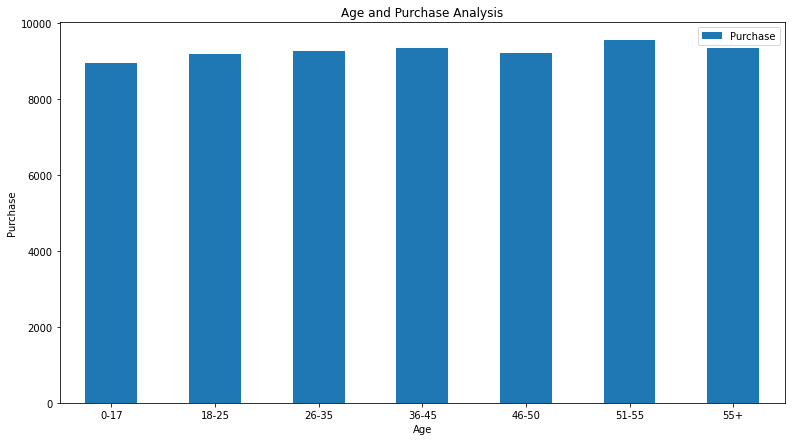

In [ ]:
age_plot = amount_df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# Coorelation Matrix

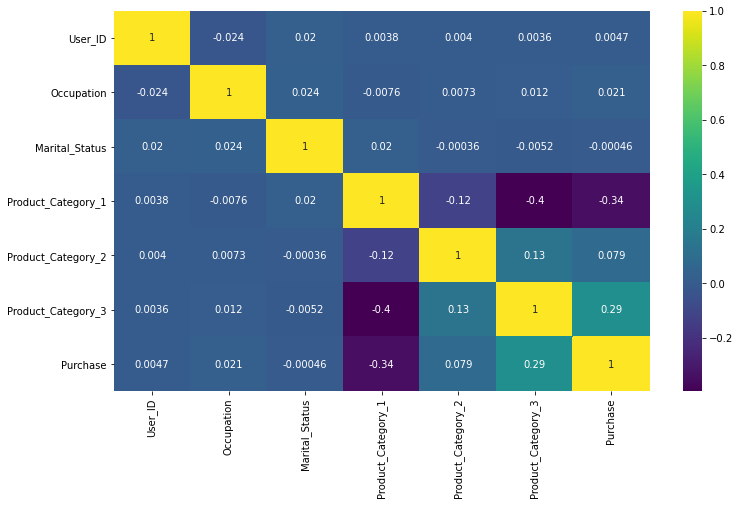

In [ ]:
correlations = amount_df.corr()
f, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(correlations, annot = True, cmap='viridis')

# Encoding categorical data

In [ ]:
# label encoding
#NB: Yuo can also use one hot encoding cos it can improve the metrics for the model

cols = ['Gender','Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    amount_df[col] = le.fit_transform(amount_df[col])
amount_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


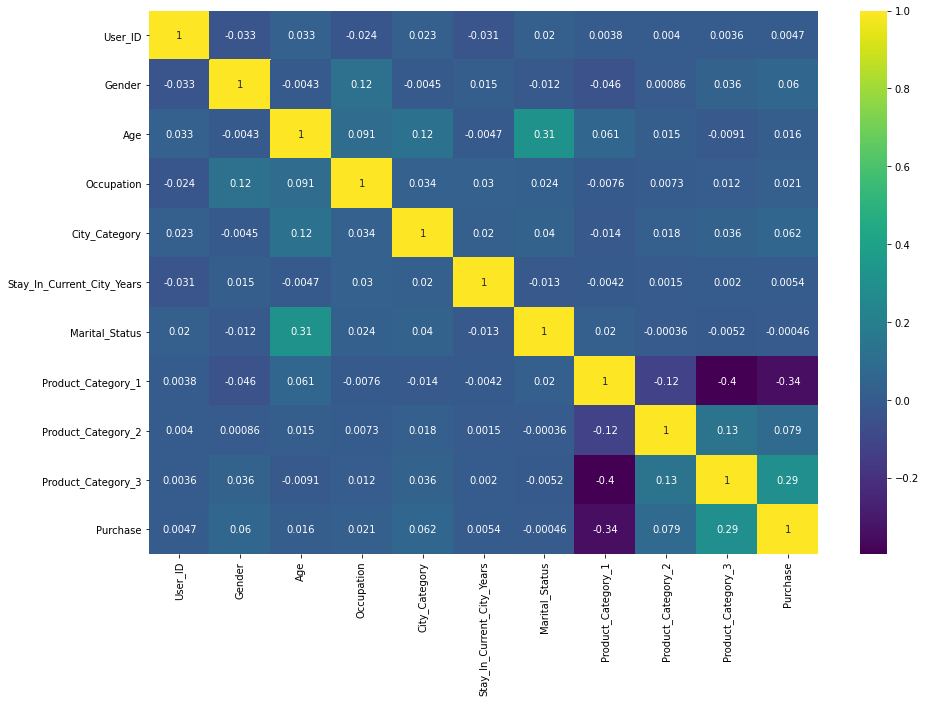

In [ ]:
#Redo corelation Matrix

correlations = amount_df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlations, annot = True, cmap='viridis')

In [ ]:
#Input Split


X = amount_df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = amount_df['Purchase']


# Splitting the dataset into the Training set and Test set

In [ ]:

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4617.99403420172
CV Score: 4625.252945835688


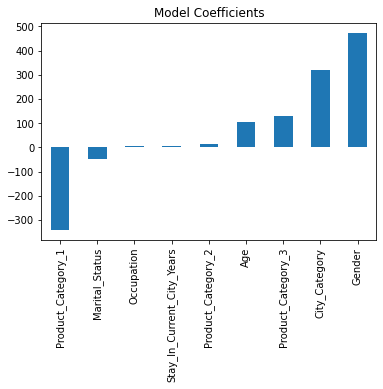

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3366.525272954723
CV Score: 3339.7146265414012


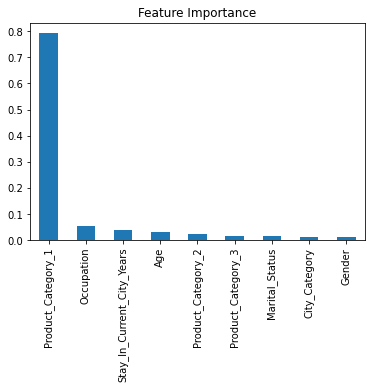

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3063.3827921432353
CV Score: 3051.8863680194436


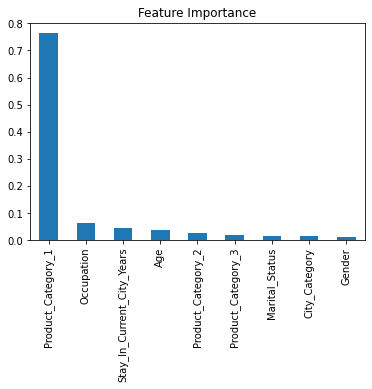

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3195.2162293412584
CV Score: 3180.5626276792086


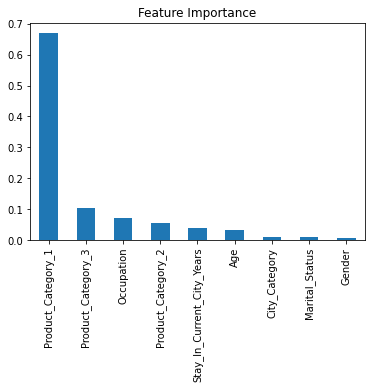

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')